Mounted at /content/drive


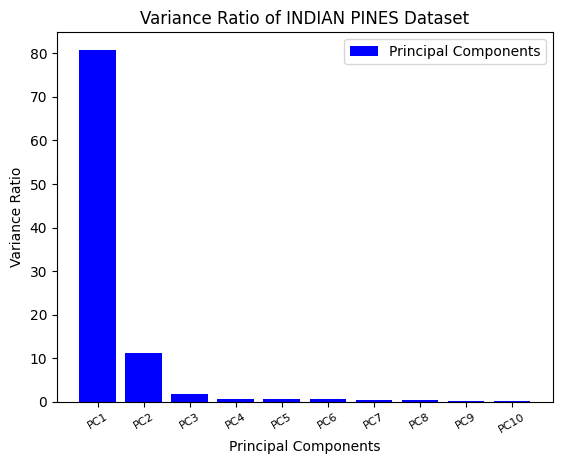

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn import datasets

# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/Complete_Data_.csv")

from sklearn.preprocessing import StandardScaler

# Create lists for features and indices
n = []
ind = []
for i in range(200):
    n.append(i+1)
for i in range(200):
    ind.append('px' + str(n[i]))

features = ind

# Extract features and target variables
x = df.loc[:, features].values
y = df.loc[:,['target']].values

from sklearn.preprocessing import MinMaxScaler

# Scale the features using MinMaxScaler
scaler_model = MinMaxScaler()
scaler_model.fit(x.astype(float))
x = scaler_model.transform(x)

from sklearn.decomposition import PCA

# Perform PCA with 10 components
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
ev = pca.explained_variance_ratio_

# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC-1', 'PC-2'])
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

# Plot the variance ratio of the principal components
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], list(ev*100), label='Principal Components', color='b')
plt.legend()
plt.xlabel('Principal Components')

pc = []
for i in range(10):
    pc.append('PC' + str(i+1))

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], pc, fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of INDIAN PINES Dataset')
plt.show()

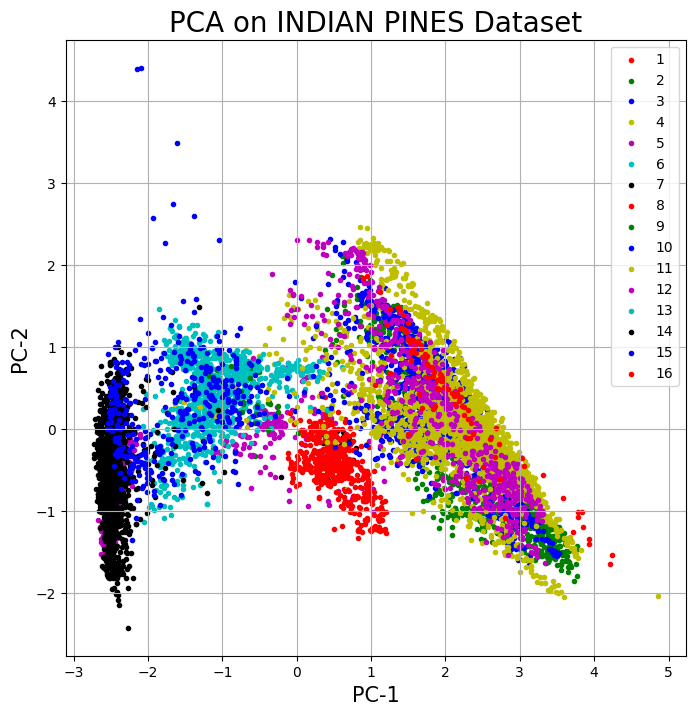

In [2]:
fig = plt.figure(figsize=(8, 8))  # Create a new figure with a specific size
ax = fig.add_subplot(1, 1, 1)  # Add a subplot to the figure

ax.set_xlabel('PC-1', fontsize=15)  # Set the x-axis label
ax.set_ylabel('PC-2', fontsize=15)  # Set the y-axis label
ax.set_title('PCA on INDIAN PINES Dataset', fontsize=20)  # Set the title of the plot

targets = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  # List of target values
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'r', 'g', 'b', 'y', 'm', 'c', 'k', 'b', 'r']  # List of colors

# Plot the scatter plot of the principal components
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target  # Select the data points with the specific target value
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1'], finalDf.loc[indicesToKeep, 'PC-2'], c=color, s=9)

ax.legend(targets)  # Add a legend with target values
ax.grid()  # Add grid lines to the plot
plt.show()  # Display the plot

[ 3  0 15 11 12  5 10 14 16  2  4  8  6  9  1  7 13]
Shape of w: (3, 17)
Prediction for the first sample: 0


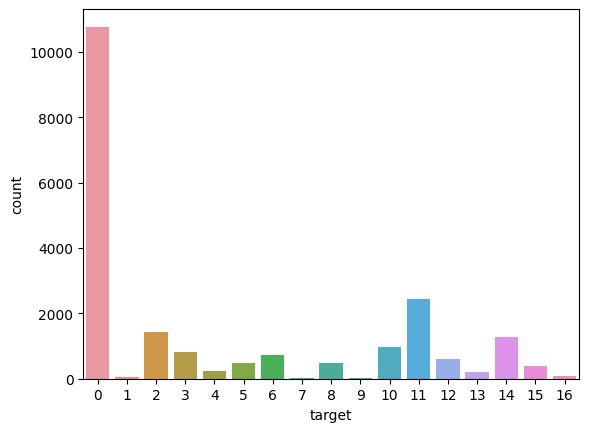

In [3]:
# Save the final DataFrame after PCA to a CSV file
finalDf.to_csv('indian_pines_after_pca.dat')

# Print the unique values in the 'target' column of the final DataFrame
print(finalDf.target.unique())

import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Add a constant column 'PC-3' filled with ones to the final DataFrame
finalDf['PC-3'] = np.ones(len(finalDf))

test_size = 0.20

# Extract the feature matrix X and the target variable Y from the final DataFrame
X = finalDf[['PC-1', 'PC-2', 'PC-3']].values.astype(np.float64)
Y = finalDf[['target']].values

# One-hot encode the target variable
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(Y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, onehot_encoded, test_size=test_size, random_state=43)

dem = 0
num = 0

# Calculate the numerator and denominator for the weight calculation
for i in range(len(X_train)):
    a = np.array([X_train[i]])
    b = a.T
    c = b.dot(a)
    d = np.array([Y_train[i]])
    e = d.T
    f = b.dot(d)
    num = num + f
    dem = dem + c

lamda = 1000
dem = dem + lamda
deminv = inv(np.matrix(dem))

# Calculate the weight vector
w = deminv.dot(num)

# Print the shape of the weight vector
print("Shape of w:", w.shape)

# Make predictions on the test set using the weight vector
res = X_test.dot(w)

# Print the prediction for the first sample in the test set
print("Prediction for the first sample:", np.argmax(res[0]))

y_pred = []

# Convert the predicted values to class labels
for i in res:
    y_pred.append(np.argmax(i))

# Convert the one-hot encoded target variable back to class labels
Y_test = [(np.argmax(i)) for i in Y_test]

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each class in the 'target' column
sns.countplot(x='target', data=finalDf)
plt.show()

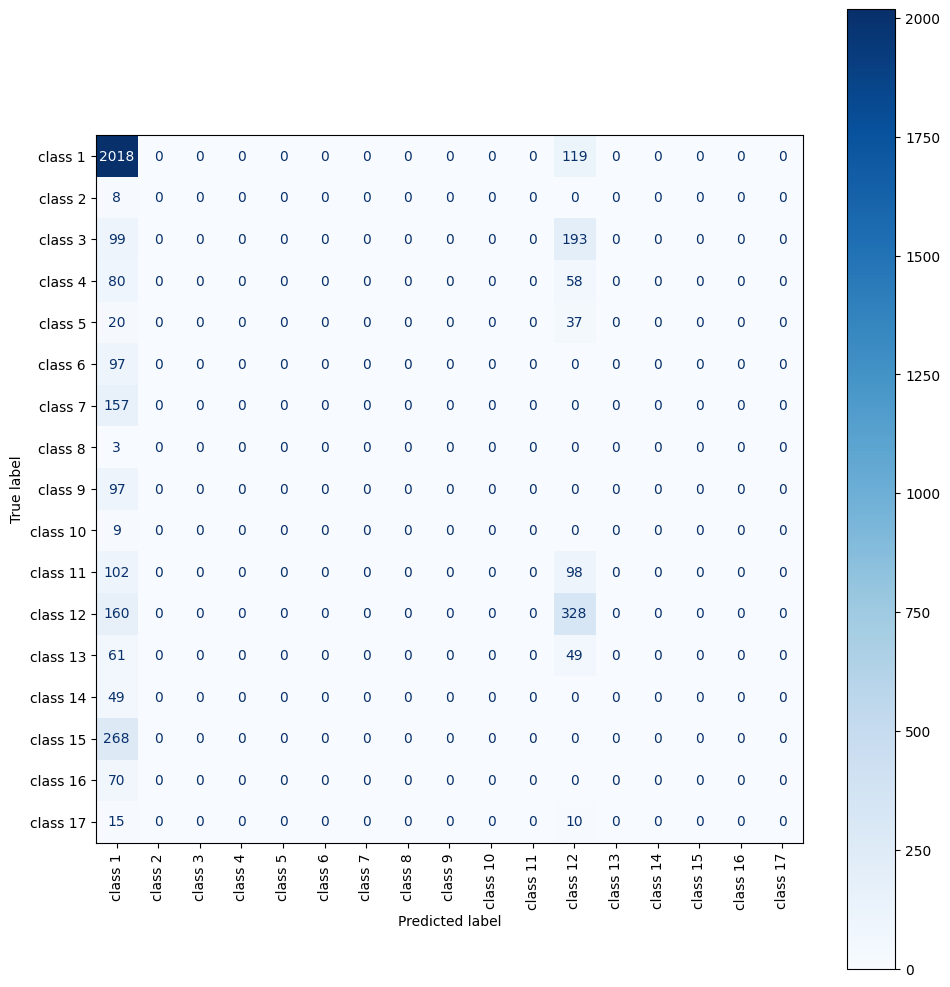

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the class names for the confusion matrix
class_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 
               'class 9', 'class 10', 'class 11', 'class 12', 'class 13', 'class 14', 'class 15', 'class 16', 'class 17']

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the confusion matrix using the display object
display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', values_format='d')

# Adjust the layout to prevent labels overlapping
plt.tight_layout()

# Display the plot
plt.show()